# Proyek Analisis Data: E-Commerce Public Dataset
- Kelompok : 7
- Anggota :  
10123470 - Farhan Nawwafal Pramudia  
10123132 - Dwi Putra Juniargi   
10123135 - Muhammad Faishal Rahmani  
10123151 - Rizqi Akbar Fadilah  
10123157 - Idin Naufal Hakim  
10123134 - Muhammad Ikhsan Fadillah  


## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Produk apa yang paling banyak dibeli ? - 10123470 - Farhan Nawwafal Pramudia
- Pertanyaan 2 : Apa saja top 3 produk yang paling banyak dibeli ? - 10123470 - Farhan Nawwafal Pramudia
- Pertanyaan 3 : Payment_Type apa yang paling banyak digunakan untuk pembayaran dan berapa persentasenya ? - 10123470 - Farhan Nawwafal Pramudia  
- Pertanyaan 4 : price produk apa yang memiliki harga tertinggi ? - 10123135 - Muhammad Faishal Rahmani  
- Pertanyaan 5 : price produk apa yang memiliki harga terendah ? - 10123135 - Muhammad Faishal Rahmani  
- Pertanyaan 6 : Kota apa saja yang mencatat pesanan (order) *perfumery* tertinggi ? - 10123132 - Dwi Putra Juniargi  
- Pertanyaan 7 : Di kota manakah produk *furniture_decor* paling banyak dipesan (order) ? - 10123132 - Dwi Putra Juniargi
- pertanyaan 8 : Berapa total presentase untuk review_score bernilai 1 ? - 10123157 - Idin Naufal Hakim
- pertanyaan 9 : Berapa presentase untuk masing-masing order_status ? - 10123157 - Idin Naufal Hakim
- pertanyaan 10 : Berapa jumlah data di review_score yang scorenya bernilai 5 ? - 10123134 - Muhammad Ikhsan Fadillah
- pertanyaan 11 :  Apa saja top 3 produk dengan freight_value(biaya pengiriman) paling besar ? - 10123134 - Muhammad Ikhsan Fadillah
- pertanyaan 12 :  5 Kota mana saja yang memiliki catatan rata-rata freight_value(biaya pengiriman) paling Besar ? - 10123134 - Muhammad Ikhsan Fadillah  
- pertanyaan 13 : Berapa Rata Rata dimensi product (Panjang, Lebar, Tinggi) ? - 10123151 - Rizqi Akbar Fadilah


## Menyiapkan semua library yang dibutuhkan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

**Membaca Dataset `customer_dataset`**  
**Gathering data dilakukan oleh : Farhan Nawwafal Pramudia**

In [ ]:
# Farhan Nawwafal Pramudia
customers_df = pd.read_csv('/content/drive/MyDrive/Pemrograman Dasar Sains Data/tugas-kelompok/E-Commerce-Public-Dataset/customers_dataset.csv', delimiter=',')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Membaca Dataset `geolocation_dataset`**  
**Gathering data dilakukan oleh : Farhan Nawwafal Pramudia**

In [ ]:
geolocation_df = pd.read_csv('/content/drive/MyDrive/Pemrograman Dasar Sains Data/tugas-kelompok/E-Commerce-Public-Dataset/geolocation_dataset.csv', delimiter=',')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


**Membaca Dataset `order_items_dataset`**  
**Gathering data dilakukan oleh : Muhammad Faishal Rahmani**

In [ ]:
order_items_df = pd.read_csv('/content/drive/MyDrive/Pemrograman Dasar Sains Data/tugas-kelompok/E-Commerce-Public-Dataset/order_items_dataset.csv', delimiter=',')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Membaca Dataset `order_payments_dataset`**  
**Gathering data dilakukan oleh : Idin Naufal Hakim**

In [ ]:
order_payments_df = pd.read_csv('/content/drive/MyDrive/Pemrograman Dasar Sains Data/tugas-kelompok/E-Commerce-Public-Dataset/order_payments_dataset.csv', delimiter=',')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Membaca Dataset `order_reviews_dataset`**  
**Gathering data dilakukan oleh : Idin Naufal Hakim**

In [ ]:
order_reviews_df = pd.read_csv('/content/drive/MyDrive/Pemrograman Dasar Sains Data/tugas-kelompok/E-Commerce-Public-Dataset/order_reviews_dataset.csv', delimiter=',')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Membaca Dataset `orders_dataset`**  
**Gathering data dilakukan oleh : Muhammad Faishal Rahmani**

In [ ]:
orders_df = pd.read_csv('/content/drive/MyDrive/Pemrograman Dasar Sains Data/tugas-kelompok/E-Commerce-Public-Dataset/orders_dataset.csv', delimiter=',')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Membaca Dataset `product_category_name_translation_dataset`**  
**Gathering data dilakukan oleh : Rizqi Akbar Fadillah**

In [ ]:
product_category_name_df = pd.read_csv('/content/drive/MyDrive/Pemrograman Dasar Sains Data/tugas-kelompok/E-Commerce-Public-Dataset/product_category_name_translation.csv', delimiter=',')
product_category_name_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Membaca Dataset `products_dataset`**  
**Gathering data dilakukan oleh : Muhammad Ikhsan Fadillah**

In [ ]:
products_df = pd.read_csv("/content/drive/MyDrive/Pemrograman Dasar Sains Data/tugas-kelompok/E-Commerce-Public-Dataset/products_dataset.csv", delimiter=",")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Membaca Dataset `sellers_dataset`**  
**Gathering data dilakukan oleh : Dwi Putra Juniargi**

In [ ]:
sellers_df = pd.read_csv("/content/drive/MyDrive/Pemrograman Dasar Sains Data/tugas-kelompok/E-Commerce-Public-Dataset/sellers_dataset.csv", delimiter=",")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

**Menilai tabel `customer_df`**  
**Assesing dilakukan oleh : Farhan Nawwafal Pramudia**

In [ ]:
# Mengecek summary dataset
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Insight : Berdasarkan *summary* pada dataset customer, tipe datanya sudah benar, tidak ada yang salah atau tidak tepat. Dan tidak ada data yang null

In [ ]:
# Mengecek ringkasan descriptive statistics
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [ ]:
# Memastikan tidak ada data yang null
print(customers_df.isna().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


Insight : Berdasarkan data di atas, terbukti bahwa tidak ada nilai null untuk dataset ini

In [ ]:
# Mengecek apakah ada data yang duplicate
print(f'Jumlah data duplikat : {customers_df.duplicated().sum()}')

Jumlah data duplikat : 0


**Menilai tabel `geolocation_df`**  
**Assesing dilakukan oleh : Farhan Nawwafal Pramudia**

In [ ]:
# Mengecek summary dataset
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Insight : Berdasarkan *summary* dataset di atas, terlihat jelas bahwa data tersebut tidak memiliki missing values dan tipe datanya pun sudah tepat

In [ ]:
# Mengecek ringkasan descriptive statistics
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [ ]:
# Mengecek tidak ada nilai yang null
print(geolocation_df.isna().sum())

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


Insight : Berdasarkan data di atas, terbukti bahwa tidak ada nilai null

In [ ]:
# Mengecek apakah ada data yang duplicate
print(f'Jumlah data duplikat : {geolocation_df.duplicated().sum()}')

Jumlah data duplikat : 261831


Insight : Terlihat jelas bahwa terdapat data duplikat yang begitu banyak dalam dataset tersebut. Maka dari itu, semua data duplikat harus dihapus pada proses cleaning data nanti

**Menilai tabel `order_items_df`**  
**Assesing dilakukan oleh : Muhammad Faishal Rahmani**

In [ ]:
# Mengecek summary dataset
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Insight : Berdasarkan informasi di atas, terlihat bahwa tidak ada yang null. Namun, ada tipe data yang tidak tepat, yaitu pada kolom shipping_limit_date. Seharusnya tipe datanya datetime bukan object. Hal ini akan dibenarkan pada proses Cleaning Data.

In [ ]:
# Mengecek ringkasan descriptive statisika
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [ ]:
# Memastikan bahwa tidak ada yang null
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


Insight : Terbukti bahwa tidak ada nilai null pada data order_items

In [ ]:
# Mengecek apakah ada data duplicate
print(f'Jumlah data duplikat : {order_items_df.duplicated().sum()}')

Jumlah data duplikat : 0


**Menilai tabel `order_payments_df`**  
**Assesing dilakukan oleh : Idin Naufal Hakim**

In [ ]:
# Mengecek summary dataset
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Insight : Berdasarkan summary data di atas, tidak ada data yang null dan tipe data kolomnya pun sudah sesuai

In [ ]:
# Mengecek ringkasan descriptive statistics
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [ ]:
# Mengecek tidak ada nilai yang null
print(order_payments_df.isna().sum())

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


Insight : Terbukti bahwa tidak ada yang null

In [ ]:
# Mengecek apakah ada data yang duplicate
print(f'Jumlah data duplikat : {order_payments_df.duplicated().sum()}')

Jumlah data duplikat : 0


Insight : Berdasarkan hasil di atas, terlihat bahwa order_payment tidak memiliki data yang duplikat

**Menilai tabel `order_reviews_df`**  
**Assesing dilakukan oleh : Idin Naufal Hakim**

In [ ]:
# Mengecek summary dataset
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Insight : Berdasarkan data di atas, terdapat beberapa data yang null, dikarenakan terdapat jumlah data yang berbeda. Dan pada kolom review_answer_timestamp dan review_creation_date , harusnya tipe datanya datetime bukan object.

In [ ]:
# Mengecek ringkasan descriptive statistik
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Insight : Review skor paling rendah ada di skor 1 dan tertingginya ada di skor 5. Serta rata-rata review skornya adalah 4

In [ ]:
# Memastikan ada data yang null
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


Insight : Terbukti bahwa terdapat banyak data yang null pada kolom review_comment_title dan review_comment_message. Hal ini harus diperbaiki pada proses Cleaning Data

In [ ]:
# Mengecek data duplikat
print(f'Jumlah data duplikat : {order_reviews_df.duplicated().sum()}')

Jumlah data duplikat : 0


Insight : Pada dataset order_reviews tidak ada duplikat

**Menilai tabel `orders_df`**  
**Assesing dilakukan oleh : Muhammad Faishal Rahmani**

In [ ]:
# Mengecek summary dataset
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Insight : Berdasarkan informasi dataset di atas, terlihat bahwa ada jumlah baris yang berbeda. Hal ini menandakan bahwa terdapat nilai null dan tipe data pada kolom index ke-3 hingga ke-7 memiliki tipe data yang tidak tepat. Hal ini akan diperbaiki pada proses Cleaning Data

In [ ]:
# Mengecek ringkasan descriptive statistik
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [ ]:
# Memastikan bahwa ada data yang null
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


Insight : Terbukti bahwa terdapat beberapa nilai yang null dalam beberapa kolom. Hal ini akan diperbaiki saat proses Cleaning Data

In [ ]:
# Mengecek apakah ada data yang duplikat
print(f'Jumlah data duplikat : {orders_df.duplicated().sum()}')

Jumlah data duplikat : 0


Insight : Ternyata setelah dicek, dataset orders tidak memiliki data duplikat

**Menilai tabel `product_category_name_df`**  
**Assesing dilakukan oleh : Rizqi Akbar Fadillah**

In [ ]:
# Mengecek summary dataset
product_category_name_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Insight : Berdasarkan informasi di atas, terlihat bahwa jumlah barisnya sama, otomatis tidak ada data yang null. Serta tipe data object untuk tiap kolomnya pun sudah benar

In [ ]:
product_category_name_df.nunique()

,0
product_category_name,71
product_category_name_english,71


In [ ]:
# Mengecek ringkasan descriptive statistik
product_category_name_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [ ]:
# Memastikan bahwa tidak ada yang null
product_category_name_df.isna().sum()

,0
product_category_name,0
product_category_name_english,0


Insight : Terbukti bahwa tidak ada data yang null

In [ ]:
# Mengecek data duplikat
print(f'Jumlah duplikat : {product_category_name_df.duplicated().sum()}')

Jumlah duplikat : 0


Insight : Ternyata setelah dihitung, tidak ada duplikasi data dalam dataset product_category_name_translation. Jadi data ini sudah bersih, sehingga tidak perlu dilakukan proses Cleaning Data

**Menilai tabel `products_df`**

In [ ]:
# Mengecek summary dataset
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Insight : Berdasarkan informasi di atas, terlihat jelas bahwa ada banyak kolom yang memiliki jumlah baris berbeda. Maka dari itu, dapat disimpulkan bahwa data ini memiliki banyak nilai null. Namun untuk tipe data kolomnya, sudah benar.

In [ ]:
# Mengecek ringkasan descriptive statistics
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [ ]:
# Memastikan tidak ada data yang null
print(products_df.isna().sum())

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


Insight : Terbukti bahwa ada banyak nilai null dalam data ini. Hal ini akan diperbaiki saat proses Cleaning Data

In [ ]:
# Mengecek apakah ada data yang duplicate
print(f'Jumlah data duplikat : {products_df.duplicated().sum()}')

Jumlah data duplikat : 0


Insight : Berdasarkan hasil perhitungan di atas, terlihat bahwa data ini tidak memiliki duplikasi data

**Menilai tabel `sellers_df`**  
Assesing dilakukan oleh : **Dwi Putra Juniargi**

In [ ]:
# Cek Summary Dataset Sellers
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Insight : Berdasarkan informasi di atas, terlihat bahwa jumlah baris di tiap kolomnya sama. Jadi dapat disimpulkan bahwa data ini tidak memiliki null value. Lalu tipe data dari kolomnya pun sudah benar.

In [ ]:
# Cek Deskripsi Dataset Sellers
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


In [ ]:
# Cek Data Bernilai Null/Kosong
print(sellers_df.isna().sum())

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


Insight : Terbukti bahwa data ini tidak memiliki nilai null.

In [ ]:
# Cek Jumlah Data Duplikat
print(f"Jumlah Data Duplikat : {sellers_df.duplicated().sum()}")

Jumlah Data Duplikat : 0


Insight : Berdasarkan hasil perhitungan di atas, terlihat bahwa data ini tidak memiliki duplikasi data. Maka bisa dikatakan, data ini sudah bersih, sehingga tidak perlu melakukan proses Cleaning Data.

### Cleaning Data

**Membersihkan Tabel `geolocation_dataset`**  
**Cleaning dilakukan oleh : Dwi Putra Juniargi**

In [ ]:
# Cleanning Data Duplikat
geolocation_df_hapus_duplikat = geolocation_df.drop_duplicates()
display(geolocation_df_hapus_duplikat.head())

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [ ]:
# Cek Kembali Data Duplikat
cek_duplikat = geolocation_df_hapus_duplikat.duplicated()
print(f"Jumlah Data yang Duplikat Setelah Celanning : {cek_duplikat.sum()}")

Jumlah Data yang Duplikat Setelah Celanning : 0


**Membersihkan tabel `order_items`**  
**Cleaning dilakukan oleh : Muhammad Ikhsan Fadillah**

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Insight : Seperti yang telah dikatakan pada proses assesing data order_items, maka tipedata dari colums shipping_limit_date akan diubah ke datetime

**Memperbaiki Tipe Data**

In [ ]:
# mengambil kolom-kolom yang ingin diubah tipe datanya menjadi datetime
order_items_df['shipping_limit_date'] = pd.to_datetime(order_items_df['shipping_limit_date'])

In [ ]:
# Memastikan bahwa tipe data sudah berubah untuk kolom-kolom tersebut
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Insight : Sekarang, tipe data kolom shipping_limit_date sudah benar.

**Membersihkan tabel `order_reviews`** (review_comment_title)  
**Cleaning dilakukan oleh : Muhammad Faishal Rahmani**

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
# Menghitung jumlah data review_comment_title yang bernilai nan/null
jumlah_review_comment_title_nan = order_reviews_df['review_comment_title'].isna().sum()
print(f"Jumlah nilai NaN pada Kolom review_comment_title = {jumlah_review_comment_title_nan}")

Jumlah nilai NaN pada Kolom review_comment_title = 87656


**Missing values**

In [ ]:
# List mapping review_score dan review_comment_title
review_mapping = [
    (5, 'Super recomendo'),
    (4, 'recomendo'),
    (3, 'Bom'),
    (2, 'bom, mas o produto demorou muito para chegar'),
    (1, 'Não chegou meu produto')
]

In [ ]:
# Loop untuk memperbarui nilai 'review_comment_title' berdasarkan kondisi
for score, comment in review_mapping:
    order_reviews_df.loc[
        (order_reviews_df['review_comment_title'].isna()) & (order_reviews_df['review_score'] == score),
        'review_comment_title'
    ] = comment

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     99224 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,recomendo,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Super recomendo,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Super recomendo,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Super recomendo,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Super recomendo,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Membersihkan tabel `orders_reviews` (review_comment_message)**  
**Cleaning dilakukan oleh : Idin Naufal Hakim**

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     99224 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
# Menghitung jumlah data review_comment_message yang bernilai nan/null
jumlah_review_comment_message_nan = order_reviews_df['review_comment_message'].isna().sum()
print(f"Jumlah nilai NaN pada Kolom review_comment_message = {jumlah_review_comment_message_nan}")

Jumlah nilai NaN pada Kolom review_comment_message = 58247


**Missing values**

In [ ]:
# List mapping review_score dan review_comment_message
review_mapping = [
    (5, 'Super recomendo'),
    (4, 'recomendo'),
    (3, 'Bom'),
    (2, 'bom, mas o produto demorou muito para chegar'),
    (1, 'Não chegou meu produto')
]

In [ ]:
# Loop untuk memperbarui nilai 'review_comment_message' berdasarkan kondisi
for score, comment in review_mapping:
    order_reviews_df.loc[
        (order_reviews_df['review_comment_message'].isna()) & (order_reviews_df['review_score'] == score),
        'review_comment_message'
    ] = comment

**Memperbaiki tipe data**

In [ ]:
datetime_columns_reviews = ['review_answer_timestamp', 'review_creation_date']
for column in datetime_columns_reviews:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [ ]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [ ]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,recomendo,recomendo,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Super recomendo,Super recomendo,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Super recomendo,Super recomendo,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Super recomendo,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Super recomendo,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


**Membersihkan tabel `orders_dataset`**  
**Cleaning dilakukan oleh : Farhan Nawwafal Pramudia**

In [ ]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Insight : Seperti yang telah dikatakan pada proses assesing data orders, maka kolom dengan index ke-3 hingga ke-7 akan perbaiki

**Memperbaiki tipe data**

In [ ]:
# mengambil kolom-kolom yang ingin diubah tipe datanya menjadi datetime
datetime_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

# proses mengubah kolom pada variable datetime_columns
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [ ]:
# Memastikan bahwa tipe data sudah berubah untuk kolom-kolom tersebut
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Insight : Sekarang, tipe data kolom index ke-3 hingga ke-7 sudah benar.

**Missing values**

1. **Proses mengisi nilai NaN pada kolom order_approved_at**

In [ ]:
# Memastikan bahwa tidak ada data yang null pada kolom approved_at.
valid_approved_orders_df = orders_df[orders_df['order_approved_at'].notna()]

In [ ]:
# menghitung selisih (satuan jam) kolom order_purchase_timestamp dengan order_approved_at untuk mengisi perkiraan nilai NaN pada kolom order_approved_at
approved_time_difference = (valid_approved_orders_df['order_approved_at'] - valid_approved_orders_df['order_purchase_timestamp']) / pd.Timedelta(hours=1)


In [ ]:
# menambahkan kolom bantu untuk melihat selisih antar 2 kolom yang tadi.
valid_approved_orders_df.loc[:, 'approved_time_difference'] = approved_time_difference

<ipython-input-274-0c519ef02f8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_approved_orders_df.loc[:, 'approved_time_difference'] = approved_time_difference


In [ ]:
# Menampilkan selisih kolom order_approved_at dengan order_purchase_timestamp
valid_approved_orders_df[['order_approved_at', 'order_purchase_timestamp', 'approved_time_difference']].head(20)

,order_approved_at,order_purchase_timestamp,approved_time_difference
0,2017-10-02 11:07:15,2017-10-02 10:56:33,0.178333
1,2018-07-26 03:24:27,2018-07-24 20:41:37,30.713889
2,2018-08-08 08:55:23,2018-08-08 08:38:49,0.276111
3,2017-11-18 19:45:59,2017-11-18 19:28:06,0.298056
4,2018-02-13 22:20:29,2018-02-13 21:18:39,1.030556
5,2017-07-09 22:10:13,2017-07-09 21:57:05,0.218889
6,2017-04-13 13:25:17,2017-04-11 12:22:08,49.052500
7,2017-05-16 13:22:11,2017-05-16 13:10:30,0.194722
8,2017-01-25 02:50:47,2017-01-23 18:29:09,32.360556
9,2017-07-29 12:05:32,2017-07-29 11:55:02,0.175000


In [ ]:
# Menghitung rata-rata dan standar deviasi untuk mengetahui penyebaran data
mean_approved_time_difference = np.mean(valid_approved_orders_df['approved_time_difference'])
range_approved_time_difference = valid_approved_orders_df['approved_time_difference'].max() - valid_approved_orders_df['approved_time_difference'].min()
std_approved_time_difference = np.std(valid_approved_orders_df['approved_time_difference'])

In [ ]:
# Menampilkan hasil mean, std, dan range
print(f'Mean data : {mean_approved_time_difference:.2f}')
print(f'Range data : {range_approved_time_difference:.2f}')
print(f'Standar deviasi : {std_approved_time_difference:.2f}')

Mean data : 10.42
Range data : 4509.18
Standar deviasi : 26.04


Insight : Pada informasi di atas, telihat bahwa nilai std sangat jauh dari nilai mean. Juga rangenya memiliki nilai yang sangat tinggi. Artinya, terdapat outlier yang menyebabkan nilai range dan std nya tinggi.  

Mengecek outlier menggunakan method IQR Rule

In [ ]:
# Menghitung Q1, Q3 dan IQR
q1 = valid_approved_orders_df['approved_time_difference'].quantile(0.25)
q3 = valid_approved_orders_df['approved_time_difference'].quantile(0.75)
iqr = q3 - q1

In [ ]:
# Menghitung batas bawah dan batas atas
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

In [ ]:
# Menampilkan hasil perhitungan
print(f'Nilai Q1 : {q1:.3f}')
print(f'Nilai Q3 : {q3:.3f}')
print(f'Nilai IQR : {iqr:.3f}')
print(f'Nilai batas bawah : {batas_bawah:.3f}')
print(f'Nilai batas atas : {batas_atas:.3f}')

Nilai Q1 : 0.215
Nilai Q3 : 14.581
Nilai IQR : 14.366
Nilai batas bawah : -21.334
Nilai batas atas : 36.130


Insight : Dari informasi di atas, batas bawah nilainya negatif. Maka hal ini tidak mungkin, karna waktu tidak memiliki nilai negatif. Jadi kita gunakan batas atas saja.  

Insight : Artinya, ketika ada data pada kolom time_difference yg nilainya > batas_atas, maka semua nilai itu dianggap outliers

Menampilkan outlier

In [ ]:
# Mengecek data pada kolom time_difference yang nilainya > batas atas
outliers = valid_approved_orders_df[valid_approved_orders_df['approved_time_difference'] > batas_atas]
print(f'Jumlah baris yang memiliki outliers : {outliers.shape[0]}')

Jumlah baris yang memiliki outliers : 9141


In [ ]:
# Mengecek jumlah data null/NaN di kolom order_approved_at
print(f'Jumlah data NaN di kolom order_approved_at sebelum diperbaiki : {orders_df.order_approved_at.isna().sum()}')

Jumlah data NaN di kolom order_approved_at sebelum diperbaiki : 160


Mengisi nilai NaN pada kolom order_approved_at

In [ ]:
# Memisahkan data yang tidak outlier, agar tidak memengaruhi pengisian nilai NaN
clean_approved_time_difference = valid_approved_orders_df[(valid_approved_orders_df['approved_time_difference'] >= 0) & (valid_approved_orders_df['approved_time_difference'] <= batas_atas)]

In [ ]:
# Mengambil nilai median dari data yang tidak memiliki outlier
median_approved_time_difference = clean_approved_time_difference['approved_time_difference'].median()

In [ ]:
# Mengisi nilai NaN pada kolom order_approved_at dalam data orders_df
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna(orders_df['order_purchase_timestamp'] + pd.to_timedelta(median_approved_time_difference, 'h'))
display(orders_df.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [ ]:
# Mengecek jumlah data null/NaN di kolom order_approved_at
print(f'Jumlah data NaN di kolom order_approved_at setelah diperbaiki : {orders_df.order_approved_at.isna().sum()}')

Jumlah data NaN di kolom order_approved_at setelah diperbaiki : 0


2. **Proses mengisi nilai NaN pada kolom `order_delivered_carrier_date`**

In [ ]:
# Memastika bahwa tidak ada data yang null dalam kolom order_delivered_carrier_date
valid_carrier_orders_df = orders_df[orders_df['order_delivered_carrier_date'].notna()]
display(valid_carrier_orders_df.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


Memastikan bahwa tidak ada data yang NaT pada kolom order_delivered_carrier_date yang disimpan dalam variable valid_carrier_ordrers_df

In [ ]:
# Menghitung selisih jumlah baris pada kolom order_delivered_carrier_date sebelum difilter dan sesudah difilter
print(valid_carrier_orders_df['order_delivered_carrier_date'].isna().sum())

0


In [ ]:
# Menghitung selisih kolom order_approved_at dengan kolom order_delivered_carrier_date
carrier_time_difference = (valid_carrier_orders_df['order_delivered_carrier_date'] - valid_carrier_orders_df['order_approved_at']) / pd.Timedelta(hours=1)

In [ ]:
# Menambahkan kolom bantu untuk melihat selisih kolom tersebut
valid_carrier_orders_df.loc[:, 'carrier_time_difference'] = carrier_time_difference

<ipython-input-290-45d9de939bb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_carrier_orders_df.loc[:, 'carrier_time_difference'] = carrier_time_difference


In [ ]:
# Menampilkan hasil selisih antar kolom
valid_carrier_orders_df[['order_delivered_carrier_date', 'order_approved_at', 'carrier_time_difference']].head(15)

,order_delivered_carrier_date,order_approved_at,carrier_time_difference
0,2017-10-04 19:55:00,2017-10-02 11:07:15,56.795833
1,2018-07-26 14:31:00,2018-07-26 03:24:27,11.109167
2,2018-08-08 13:50:00,2018-08-08 08:55:23,4.910278
3,2017-11-22 13:39:59,2017-11-18 19:45:59,89.900000
4,2018-02-14 19:46:34,2018-02-13 22:20:29,21.434722
5,2017-07-11 14:58:04,2017-07-09 22:10:13,40.797500
7,2017-05-22 10:07:46,2017-05-16 13:22:11,140.759722
8,2017-01-26 14:16:31,2017-01-25 02:50:47,35.428889
9,2017-08-10 19:45:24,2017-07-29 12:05:32,295.664444
10,2017-05-18 11:40:40,2017-05-16 19:50:18,39.839444


In [ ]:
# Mengecek berapa banyak baris yang carrier_time_differencenya tidak minus dan minus
normal_carrier_time_difference = valid_carrier_orders_df[valid_carrier_orders_df['carrier_time_difference'] > 0]
anomalies_carrier_time_difference = valid_carrier_orders_df[valid_carrier_orders_df['carrier_time_difference'] < 0]

In [ ]:
# Menampilkan hasil baris yang normal dan anomali
print(f'Jumlah baris yang memiliki normal : {normal_carrier_time_difference.shape[0]}')
print(f'Jumlah baris yang memiliki anomali : {anomalies_carrier_time_difference.shape[0]}')

Jumlah baris yang memiliki normal : 96299
Jumlah baris yang memiliki anomali : 1359


In [ ]:
# Hitung persentase data anomali
anomalies_data_percentage = (anomalies_carrier_time_difference.shape[0] / normal_carrier_time_difference.shape[0])
print(f'{anomalies_data_percentage * 100:.2f}%')

1.41%


Persentasenya sangat kecil, oleh karena itu, saya akan mengambil data yang tidak anomali saja

In [ ]:
# Mengambil data normal (tidak ada anomali)
valid_carrier_orders_df = normal_carrier_time_difference[normal_carrier_time_difference['carrier_time_difference'].notna()]
display(valid_carrier_orders_df.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,carrier_time_difference
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,56.795833
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,11.109167
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,4.910278
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,89.900000
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,21.434722


In [ ]:
# Menghitung rata-rata dan standar deviasi untuk mengetahui penyebaran data
mean_carrier_time_difference = np.mean(valid_carrier_orders_df['carrier_time_difference'])
range_carrier_time_difference = valid_carrier_orders_df['carrier_time_difference'].max() - valid_carrier_orders_df['carrier_time_difference'].min()
std_carrier_time_difference = np.std(valid_carrier_orders_df['carrier_time_difference'])

In [ ]:
# Menampilkan hasil mean, std, dan range
print(f'Mean data : {mean_carrier_time_difference:.2f}')
print(f'Range data : {range_carrier_time_difference:.2f}')
print(f'Standar deviasi : {std_carrier_time_difference:.2f}')

Mean data : 68.63
Range data : 3018.30
Standar deviasi : 83.96


Insight : Pada informasi di atas, telihat bahwa nilai std tidak terlalu jauh dari nilai mean. Namun, rangenya memiliki nilai yang sangat tinggi. Artinya, terdapat outlier yang menyebabkan nilai range dan std nya tinggi.  

Mengecek outlier menggunakan method IQR Rule

In [ ]:
# Menghitung Q1, Q3 dan IQR
q1 = valid_carrier_orders_df['carrier_time_difference'].quantile(0.25)
q3 = valid_carrier_orders_df['carrier_time_difference'].quantile(0.75)
iqr = q3 - q1

In [ ]:
# Menghitung batas bawah dan batas atas
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

In [ ]:
# Menampilkan hasil perhitungan
print(f'Nilai Q1 : {q1:.3f}')
print(f'Nilai Q3 : {q3:.3f}')
print(f'Nilai IQR : {iqr:.3f}')
print(f'Nilai batas bawah : {batas_bawah:.3f}')
print(f'Nilai batas atas : {batas_atas:.3f}')

Nilai Q1 : 21.638
Nilai Q3 : 87.009
Nilai IQR : 65.371
Nilai batas bawah : -76.418
Nilai batas atas : 185.066


Insight : Dari informasi di atas, batas bawah nilainya negatif. Maka hal ini tidak mungkin, karna waktu tidak memiliki nilai negatif. Jadi kita gunakan batas atas saja.  

Insight : Artinya, ketika ada data pada kolom time_difference yg nilainya > batas_atas, maka semua nilai itu dianggap outliers

Menampilkan outlier

In [ ]:
# Mengecek data pada kolom time_difference yang nilainya > batas atas
outliers_carrier = valid_carrier_orders_df[valid_carrier_orders_df['carrier_time_difference'] > batas_atas]
print(f'Jumlah baris yang memiliki outliers : {outliers.shape[0]}')

Jumlah baris yang memiliki outliers : 9141


In [ ]:
# Mengecek jumlah data null/NaN di kolom order_approved_at
print(f'Jumlah data NaN di kolom order_approved_at sebelum diperbaiki : {orders_df.order_delivered_carrier_date.isna().sum()}')

Jumlah data NaN di kolom order_approved_at sebelum diperbaiki : 1783


Mengisi nilai NaN pada kolom order_delivered_carrier_date

In [ ]:
# Memisahkan data yang tidak outlier, agar tidak memengaruhi pengisian nilai NaN
clean_carrier_time_difference = valid_carrier_orders_df[(valid_carrier_orders_df['carrier_time_difference'] >= 0) & (valid_carrier_orders_df['carrier_time_difference'] <= batas_atas)]

# Mengambil nilai median dari data yang tidak memiliki outlier
median_carrier_time_difference = clean_carrier_time_difference['carrier_time_difference'].median()
# pd.to_timedelta(median_time_difference, 'h')

In [ ]:
# Mengisi nilai NaN pada kolom order_delivered_carrier_date dalam data orders_df
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna(orders_df['order_approved_at'] + pd.to_timedelta(median_carrier_time_difference, 'h'))
display(orders_df.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [ ]:
# Mengecek jumlah data null/NaN di kolom order_delivered_carrier_date
print(f'Jumlah data NaN di kolom order_delivered_carrier_date setelah diperbaiki : {orders_df.order_delivered_carrier_date.isna().sum()}')

Jumlah data NaN di kolom order_delivered_carrier_date setelah diperbaiki : 0


3. **Proses mengisi nilai NaN pada kolom `order_delivered_customer_date`**

In [ ]:
# Memastika bahwa tidak ada data yang null dalam kolom order_delivered_customer_date
valid_customer_orders_df = orders_df[orders_df['order_delivered_customer_date'].notna()]
display(valid_customer_orders_df.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


Memastikan bahwa tidak ada data yang NaT pada kolom order_delivered_customer_date yang disimpan dalam variable valid_customer_orders_df

In [ ]:
# Menghitung selisih jumlah baris pada kolom order_delivered_customer_date sebelum difilter dan sesudah difilter
print(valid_customer_orders_df['order_delivered_customer_date'].isna().sum())

0


In [ ]:
# Menghitung selisih kolom order_approved_at dengan kolom order_delivered_customer_date
customer_time_difference = (valid_customer_orders_df['order_delivered_customer_date'] - valid_customer_orders_df['order_delivered_carrier_date']) / pd.Timedelta(hours=1)

In [ ]:
# Menambahkan kolom bantu untuk melihat selisih kolom tersebut
valid_customer_orders_df.loc[:, 'customer_time_difference'] = customer_time_difference

<ipython-input-309-10feee44bd76>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_customer_orders_df.loc[:, 'customer_time_difference'] = customer_time_difference


In [ ]:
# Menampilkan hasil selisih antar kolom
valid_customer_orders_df[['order_delivered_customer_date', 'order_delivered_carrier_date', 'customer_time_difference']].head(30)

,order_delivered_customer_date,order_delivered_carrier_date,customer_time_difference
0,2017-10-10 21:25:13,2017-10-04 19:55:00,145.503611
1,2018-08-07 15:27:45,2018-07-26 14:31:00,288.945833
2,2018-08-17 18:06:29,2018-08-08 13:50:00,220.274722
3,2017-12-02 00:28:42,2017-11-22 13:39:59,226.811944
4,2018-02-16 18:17:02,2018-02-14 19:46:34,46.507778
5,2017-07-26 10:57:55,2017-07-11 14:58:04,355.997500
7,2017-05-26 12:55:51,2017-05-22 10:07:46,98.801389
8,2017-02-02 14:08:10,2017-01-26 14:16:31,167.860833
9,2017-08-16 17:14:30,2017-08-10 19:45:24,141.485000
10,2017-05-29 11:18:31,2017-05-18 11:40:40,263.630833


In [ ]:
# Mengecek berapa banyak baris yang customer_time_differencenya tidak minus dan minus
normal_customer_time_difference = valid_customer_orders_df[valid_customer_orders_df['customer_time_difference'] > 0]
anomalies_customer_time_difference = valid_customer_orders_df[valid_customer_orders_df['customer_time_difference'] < 0]

In [ ]:
# Menampilkan jumlah baris data normal dan anomali
print(f'Jumlah baris yang memiliki normal : {normal_customer_time_difference.shape[0]}')
print(f'Jumlah baris yang memiliki anomali : {anomalies_customer_time_difference.shape[0]}')

Jumlah baris yang memiliki normal : 96444
Jumlah baris yang memiliki anomali : 23


In [ ]:
# Menampilkan data anomali pada kolom customer_time_difference
anomalies_customer_time_difference

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_time_difference
6437,a1abeb653a4d4cd1e142ccb8c82cd069,5f50465da00b7fed5dd1239f4ecf6e2c,delivered,2017-07-20 11:20:52,2017-07-21 06:43:14,2017-07-28 16:57:58,2017-07-25 19:32:56,2017-08-14,-69.417222
9553,383aa8b2724fe452d9ccd9934a8c628b,b1cb2f9d7a19480f3749e248db14d58f,delivered,2017-07-02 20:58:43,2017-07-02 21:10:20,2017-07-07 17:22:41,2017-07-06 14:27:51,2017-07-21,-26.913889
13487,cb1134f9010d242e9515ad1c78ec0c39,2fd33ac77677bd214b1882868317eeed,delivered,2017-07-16 12:35:34,2017-07-18 06:03:50,2017-07-20 19:22:02,2017-07-19 14:13:28,2017-08-08,-29.142778
14474,dceb62e8fa94b46006c9554fed743df0,2721900eb4e0f1cc2c836dd7bc1b1e11,delivered,2017-07-20 20:58:05,2017-07-22 11:45:11,2017-08-01 18:23:30,2017-07-26 18:09:10,2017-08-11,-144.238889
19268,5f9d46795c3126674e52becb3a1a517f,79287bcaafdde5c793b996fc40bb7d9f,delivered,2017-07-18 11:48:20,2017-07-18 12:03:29,2017-07-20 23:03:42,2017-07-20 18:52:41,2017-07-31,-4.183611
21338,8c78d01de3a9009e23d6877a7cc9be20,6cd7106899e59a1fbd0622d5f1efedf4,delivered,2016-10-08 15:36:50,2016-10-08 18:13:44,2016-10-26 11:41:53,2016-10-25 17:51:46,2016-11-30,-17.835278
22520,b27af682321527a6349f1761eb3f360c,9859dd92e872dbaa60ca3cd5f0d7ad07,delivered,2017-06-14 20:17:04,2017-06-14 20:30:08,2017-06-27 14:51:54,2017-06-26 15:45:35,2017-07-14,-23.105278
25393,1cc3ae63caffff2d6c3ee3e78e074acf,01c843a2c0600def0b7693dba47af460,delivered,2017-08-07 21:35:22,2017-08-08 21:45:15,2017-08-10 18:28:56,2017-08-10 18:05:38,2017-08-25,-0.388333
25646,e37f11cae9985ca58f0b56f268720537,3947a361301f2ff0f3223159a0f2701c,delivered,2017-07-26 11:46:34,2017-07-27 10:10:16,2017-08-01 18:17:47,2017-07-31 17:49:56,2017-08-24,-24.464167
27470,fa3e37584f4fdb1ded0e0de700dfcb4e,63be4feff10a0b1d85f2cfbf10df9754,delivered,2017-07-30 19:32:23,2017-07-30 19:45:09,2017-08-09 18:18:43,2017-08-01 21:13:01,2017-08-18,-189.095000


In [ ]:
# Hitung persentase data anomali
anomalies_data_percentage = (anomalies_customer_time_difference.shape[0] / normal_customer_time_difference.shape[0])
print(f'{anomalies_data_percentage * 100:.2f}%')

0.02%


Persentasenya sangat kecil, oleh karena itu, saya akan mengambil data yang tidak anomali saja

In [ ]:
# Mengambil data normal (tidak ada anomali)
valid_customer_orders_df = normal_customer_time_difference[normal_customer_time_difference['customer_time_difference'].notna()]
display(valid_customer_orders_df.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_time_difference
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,145.503611
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,288.945833
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,220.274722
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,226.811944
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,46.507778


In [ ]:
# Menghitung rata-rata dan standar deviasi untuk mengetahui penyebaran data
mean_customer_time_difference = np.mean(valid_customer_orders_df['customer_time_difference'])
range_customer_time_difference = valid_customer_orders_df['customer_time_difference'].max() - valid_customer_orders_df['customer_time_difference'].min()
std_customer_time_difference = np.std(valid_customer_orders_df['customer_time_difference'])

In [ ]:
# Menampilkan hasil mean, std, dan range
print(f'Mean data : {mean_customer_time_difference:.2f}')
print(f'Range data : {range_customer_time_difference:.2f}')
print(f'Standar deviasi : {std_customer_time_difference:.2f}')

Mean data : 224.04
Range data : 4924.58
Standar deviasi : 210.23


Insight : Pada informasi di atas, telihat bahwa nilai nilai mean > std. Juga rangenya memiliki nilai yang sangat tinggi. Artinya, terdapat outlier yang menyebabkan nilai range dan std nya tinggi.  

Mengecek outlier menggunakan method IQR Rule

In [ ]:
# Menghitung Q1, Q3 dan IQR
q1 = valid_customer_orders_df['customer_time_difference'].quantile(0.25)
q3 = valid_customer_orders_df['customer_time_difference'].quantile(0.75)
iqr = q3 - q1

In [ ]:
# Menghitung batas bawah dan batas atas
batas_bawah = q1 - 1.5 * iqr
batas_atas = q3 + 1.5 * iqr

In [ ]:
# Menampilkan hasil perhitungan
print(f'Nilai Q1 : {q1:.3f}')
print(f'Nilai Q3 : {q3:.3f}')
print(f'Nilai IQR : {iqr:.3f}')
print(f'Nilai batas bawah : {batas_bawah:.3f}')
print(f'Nilai batas atas : {batas_atas:.3f}')

Nilai Q1 : 98.467
Nilai Q3 : 288.743
Nilai IQR : 190.276
Nilai batas bawah : -186.947
Nilai batas atas : 574.157


Insight : Dari informasi di atas, batas bawah nilainya negatif. Maka hal ini tidak mungkin, karna waktu tidak memiliki nilai negatif. Jadi kita gunakan batas atas saja.  

Insight : Artinya, ketika ada data pada kolom customer_time_difference yg nilainya > batas_atas, maka semua nilai itu dianggap outliers

Menampilkan outlier

In [ ]:
# Mengecek data pada kolom customer_time_difference yang nilainya > batas atas
outliers_customer = valid_customer_orders_df[valid_customer_orders_df['customer_time_difference'] > batas_atas]
print(f'Jumlah baris yang memiliki outliers : {outliers.shape[0]}')

Jumlah baris yang memiliki outliers : 9141


In [ ]:
# Mengecek jumlah data null/NaN di kolom order_delivered_customer_date
print(f'Jumlah data NaN di kolom order_delivered_customer_date sebelum diperbaiki : {orders_df.order_delivered_customer_date.isna().sum()}')

Jumlah data NaN di kolom order_delivered_customer_date sebelum diperbaiki : 2965


Mengisi nilai NaN pada kolom order_delivered_customer_date

In [ ]:
# Memisahkan data yang tidak outlier, agar tidak memengaruhi pengisian nilai NaN
clean_customer_time_difference = valid_customer_orders_df[(valid_customer_orders_df['customer_time_difference'] >= 0) & (valid_customer_orders_df['customer_time_difference'] <= batas_atas)]

# Mengambil nilai median dari data yang tidak memiliki outlier
median_customer_time_difference = clean_customer_time_difference['customer_time_difference'].median()

In [ ]:
# Mengisi nilai NaN pada kolom order_delivered_customer_date dalam data orders_df
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna(orders_df['order_delivered_carrier_date'] + pd.to_timedelta(median_customer_time_difference, 'h'))
display(orders_df.head())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [ ]:
# Mengecek jumlah data null/NaN di kolom order_delivered_customer_date
print(f'Jumlah data NaN di kolom order_delivered_customer_date setelah diperbaiki : {orders_df.order_delivered_customer_date.isna().sum()}')

Jumlah data NaN di kolom order_delivered_customer_date setelah diperbaiki : 0


**Memastikan lagi bahwa data yang diambil hanyalah data yg masuk akal, yaitu nilai dari order_approved_at > order_delivered_carrier_date dan order_delivered_carrier_date > order_delivered_customer_date**

In [ ]:
orders_df[orders_df['order_approved_at'] > orders_df['order_delivered_carrier_date']].shape[0]

1359

Insight : Terdapat 1359 data yang masih anomali

In [ ]:
orders_df[orders_df['order_delivered_carrier_date'] > orders_df['order_delivered_customer_date']].shape[0]

23

Insight : Terdapat 23 data yang masih anomali

In [ ]:
# Mengambil data yang tidak anomali
orders_df = orders_df[
    (orders_df['order_approved_at'] < orders_df['order_delivered_carrier_date']) &
    (orders_df['order_delivered_carrier_date'] < orders_df['order_delivered_customer_date']) &
    (orders_df['order_delivered_customer_date'] < orders_df['order_estimated_delivery_date'])
]
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


**Membersihkan tabel `products_dataset`**  
**Cleaning dilakukan oleh : Rizqi Akbar Fadillah**

Missing value

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
products_df[products_df['product_category_name'].isna()].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


Pada kasus ini, kita memiliki kesempatan untuk menghapus data NaN. Dikarenakan jika data nama produk NaN, tentu ini akan memengaruhi order

In [ ]:
# Menghitung jumlah data NaN pada kolom product_category_name
nan_values_product_name = products_df[products_df['product_category_name'].isna()]
print(f'Jumlah data NaN : {nan_values_product_name.shape[0]}')

Jumlah data NaN : 610


In [ ]:
# Menghitung jumlah tidak data NaN pada kolom product_category_name
notna_values_product_name = products_df[products_df['product_category_name'].notna()]
notna_values_product_name.shape[0]

32341

In [ ]:
# Menghitung persentase data NaN
percentage_nan_values = (nan_values_product_name.shape[0] / notna_values_product_name.shape[0]) * 100
print(f'Persentase data NaN : {percentage_nan_values:.2f}%')

Persentase data NaN : 1.89%


In [ ]:
products_df = products_df.dropna()

In [ ]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB


## Exploratory Data Analysis (EDA)

### Explore `order_items` , `product_category_name_translation`, `products`, and `orders`  
**Exploratory dilakukan oleh : Farhan Nawwafal Pramudia**


#### Menggabungkan `order_items` dan `products`

In [ ]:
# left join data order_items dan products
order_products_join = pd.merge(left=order_items_df, right=products_df, how='left', on='product_id')
# order_products_join.head()

#### Menggabungkan `products` dan `products_category_name_translation`

In [ ]:
# Left join data products dan product_category_name_translation
products_category_join = pd.merge(left=product_category_name_df, right=products_df, how='left', on='product_category_name')
# products_category_join.head()

#### Hubungkan data

In [ ]:
order_products_all_df = pd.merge(
    left=order_products_join,
    right=products_category_join,
    how='left',
    left_on=['product_id', 'product_category_name'],
    right_on=['product_id', 'product_category_name'],
)
order_products_all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght_x,product_description_lenght_x,...,product_height_cm_x,product_width_cm_x,product_category_name_english,product_name_lenght_y,product_description_lenght_y,product_photos_qty_y,product_weight_g_y,product_length_cm_y,product_height_cm_y,product_width_cm_y
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,9.0,14.0,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,30.0,40.0,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,13.0,33.0,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,10.0,15.0,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,40.0,30.0,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [ ]:
# Menghitung banyaknya produk yg terjual
groupby_product = order_products_all_df.groupby('product_category_name_english')['order_item_id'].count().reset_index()
groupby_product.head()

,product_category_name_english,order_item_id
0,agro_industry_and_commerce,212
1,air_conditioning,297
2,art,209
3,arts_and_craftmanship,24
4,audio,364


In [ ]:
# Mengurutkan order_item_id secara Descending
groupby_product = groupby_product.sort_values(by='order_item_id', ascending=False)
# groupby_product[['product_category_name_english', 'or']]
groupby_product

,product_category_name_english,order_item_id
7,bed_bath_table,11115
43,health_beauty,9670
65,sports_leisure,8641
39,furniture_decor,8334
15,computers_accessories,7827
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,14
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8


### Explore `order_items` , `product_category_name_translation`, `products`, dan `order_payments`  
**Exploratory dilakukan oleh : Farhan Nawwafal Pramudia**


#### Menggabungkan `order_items` dan `order_payments`

In [ ]:
order_items_payments_join_df = pd.merge(
    left=order_payments_df,
    right=order_items_df,
    how='left',
    left_on='order_id',
    right_on='order_id',
)
order_items_payments_join_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1.0,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88


#### Menggabungkan variable `order_items_payments_join` dengan `products`

In [ ]:
products_join_df = pd.merge(
    left=order_items_payments_join_df,
    right=products_df,
    how='left',
    left_on='product_id',
    right_on='product_id'
)
products_join_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,automotivo,59.0,1274.0,2.0,150.0,16.0,6.0,11.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,cama_mesa_banho,60.0,188.0,1.0,1200.0,44.0,2.0,35.0
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1.0,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88,cama_mesa_banho,54.0,120.0,1.0,835.0,40.0,9.0,33.0


#### Menggabungkan variable `products_join` dengan `product_category_name_translation`

In [ ]:
products_all_join = pd.merge(
    left=products_join_df,
    right=product_category_name_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)
products_all_join.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,1.0,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53,casa_construcao,57.0,921.0,8.0,800.0,17.0,27.0,17.0,home_construction
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,1.0,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39,automotivo,59.0,1274.0,2.0,150.0,16.0,6.0,11.0,auto
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,1.0,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72,perfumaria,54.0,1536.0,2.0,250.0,20.0,8.0,21.0,perfumery
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,1.0,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88,cama_mesa_banho,60.0,188.0,1.0,1200.0,44.0,2.0,35.0,bed_bath_table
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,1.0,386486367c1f9d4f587a8864ccb6902b,cca3071e3e9bb7d12640c9fbe2301306,2018-05-31 16:14:41,113.57,14.88,cama_mesa_banho,54.0,120.0,1.0,835.0,40.0,9.0,33.0,bed_bath_table


#### Eksplore data untuk payment type

In [ ]:
# Menghitung banyaknya payment_type yang dilakukan dalam membeli barang
groupby_payment_type = products_all_join.groupby('payment_type')['payment_installments'].count().reset_index()
groupby_payment_type

,payment_type,payment_installments
0,boleto,23037
1,credit_card,87286
2,debit_card,1698
3,not_defined,3
4,voucher,6407


In [ ]:
# Mengurutkan data secara descending
groupby_payment_type = groupby_payment_type.sort_values(by='payment_installments', ascending=False)
groupby_payment_type

,payment_type,payment_installments
1,credit_card,87286
0,boleto,23037
4,voucher,6407
2,debit_card,1698
3,not_defined,3


### Explore `sellers_dataset`, `order_items`, `product_dataset`, and `product_translation_dataset`  
**Exploratory dilakukan oleh : Dwi Putra Juniargi**

#### Menggabungkan `order_items_df`, `sellers_df`, `products_df`, dan `product_category_name_df`  

In [ ]:
# Gabungkan order_items_df dengan sellers_df
order_sellers = pd.merge(order_items_df, sellers_df, on='seller_id', how='inner')

# Gabungkan hasil dengan products_df
order_products = pd.merge(order_sellers, products_df, on='product_id', how='inner')

# Gabungkan hasil dengan product_category_name_df
final_df_join = pd.merge(order_products, product_category_name_df, on='product_category_name', how='inner')

# Menampilkan hasil gabungan
display(final_df_join.head())

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


### Explore `order_reviews`, `order_items`, `products`, `product_category_name_translation_dataset`  
**Exploratory dilakukan oleh : Idin Naufal Hakim**

In [ ]:
item_join_product = pd.merge(order_items_df, products_df, how='left', on='product_id')
product_translated = pd.merge(item_join_product, product_category_name_df, how='left', on='product_category_name')

In [ ]:
# Menghapus baris dengan nilai null/NaN pada kolom 'product_category_name'
product_translated_not_null = product_translated.dropna(subset=['product_category_name'])

In [ ]:
max_harga = product_translated_not_null['price'].max()
final_result_max = product_translated_not_null[product_translated_not_null['price'] == max_harga].head(1)
display(final_result_max[['order_item_id','product_category_name_english','price']])

,order_item_id,product_category_name_english,price
3556,1,housewares,6735.0


In [ ]:
min_harga = product_translated_not_null['price'].min()
final_result_min = product_translated_not_null[product_translated_not_null['price'] == min_harga].head(1)
display(final_result_min[['order_item_id','product_category_name_english','price']])

,order_item_id,product_category_name_english,price
27652,1,construction_tools_construction,0.85


In [ ]:
# melakukan join dengan inner join
reviews_items = pd.merge(order_reviews_df, order_items_df, on="order_id", how="inner")
reviews_products = pd.merge(reviews_items, products_df, on="product_id", how="inner")
reviews_products_category = pd.merge(reviews_products, product_category_name_df, on="product_category_name", how="inner")

In [ ]:
# filter data review_score yang bernilai 1 sampai 5
low_score_products_1 = reviews_products_category[reviews_products_category["review_score"] == 1]
low_score_products_2 = reviews_products_category[reviews_products_category["review_score"] == 2]
low_score_products_3 = reviews_products_category[reviews_products_category["review_score"] == 3]
low_score_products_4 = reviews_products_category[reviews_products_category["review_score"] == 4]
low_score_products_5 = reviews_products_category[reviews_products_category["review_score"] == 5]

In [ ]:
# menghitung jumlah produk bernilai 1 sampai 5
product_count_1 = low_score_products_1["product_id"].nunique()
product_count_2 = low_score_products_2["product_id"].nunique()
product_count_3 = low_score_products_3["product_id"].nunique()
product_count_4 = low_score_products_4["product_id"].nunique()
product_count_5 = low_score_products_5["product_id"].nunique()

In [ ]:
print("Jumlah produk dengan review score 1:", product_count_1)
print("Jumlah produk dengan review score 2:", product_count_2)
print("Jumlah produk dengan review score 3:", product_count_3)
print("Jumlah produk dengan review score 4:", product_count_4)
print("Jumlah produk dengan review score 5:", product_count_5)

Jumlah produk dengan review score 1: 7343
Jumlah produk dengan review score 2: 2571
Jumlah produk dengan review score 3: 5555
Jumlah produk dengan review score 4: 10364
Jumlah produk dengan review score 5: 22824


### Explore `orders_dataset`  
**Exploratory dilakukan oleh : Idin Naufal Hakim**

In [ ]:
# filter data order_status
order_status_1 = orders_df[orders_df["order_status"] == "delivered"]
order_status_2 = orders_df[orders_df["order_status"] == "shipped"]
order_status_3 = orders_df[orders_df["order_status"] == "canceled"]
order_status_4 = orders_df[orders_df["order_status"] == "unavailable"]
order_status_5 = orders_df[orders_df["order_status"] == "created"]
order_status_6 = orders_df[orders_df["order_status"] == "invoiced"]
order_status_7 = orders_df[orders_df["order_status"] == "processing"]
order_status_8 = orders_df[orders_df["order_status"] == "approved"]

In [ ]:
# menghitung jumlah tiap order_status
order_status_count_1 = order_status_1["order_id"].nunique()
order_status_count_2 = order_status_2["order_id"].nunique()
order_status_count_3 = order_status_3["order_id"].nunique()
order_status_count_4 = order_status_4["order_id"].nunique()
order_status_count_5 = order_status_5["order_id"].nunique()
order_status_count_6 = order_status_6["order_id"].nunique()
order_status_count_7 = order_status_7["order_id"].nunique()
order_status_count_8 = order_status_8["order_id"].nunique()

In [ ]:
print("Jumlah order_status delivered:", order_status_count_1)
print("Jumlah order_status shipped:", order_status_count_2)
print("Jumlah order_status canceled:", order_status_count_3)
print("Jumlah order_status unavailable:", order_status_count_4)
print("Jumlah order_status created:", order_status_count_5)
print("Jumlah order_status invoiced:", order_status_count_6)
print("Jumlah order_status processing:", order_status_count_7)
print("Jumlah order_status approved:", order_status_count_8)

Jumlah order_status delivered: 87303
Jumlah order_status shipped: 1050
Jumlah order_status canceled: 585
Jumlah order_status unavailable: 586
Jumlah order_status created: 5
Jumlah order_status invoiced: 296
Jumlah order_status processing: 299
Jumlah order_status approved: 2


### Explore `order_items`, `products` , `product_category_name_translation`
**Exploratory dilakukan oleh : Muhammad Ikhsan Fadillah**

In [ ]:
# Menggabungkan tabel order_items_df dengan products_df dan product_category_name_df
items_products = pd.merge(order_items_df, products_df, on="product_id", how="inner")
items_products_category = pd.merge(items_products, product_category_name_df, on="product_category_name", how="inner")

In [ ]:
# Menghitung total freight_value untuk setiap product_id
freight_value_per_product = items_products_category.groupby("product_id")["freight_value"].sum().reset_index()

In [ ]:
# Menggabungkan kembali dengan tabel produk dan kategori untuk mendapatkan informasi tambahan
freight_value_products = pd.merge(freight_value_per_product, products_df, on="product_id", how="inner")
freight_value_products_category = pd.merge(freight_value_products, product_category_name_df, on="product_category_name", how="inner")


In [ ]:
# Mengurutkan data berdasarkan freight_value dan mengambil 3 produk teratas
top_3_freight = freight_value_products_category.sort_values(by="freight_value", ascending=False).head(3)

In [ ]:
# Menampilkan hasil sebagai DataFrame
top_3_freight_df = top_3_freight[["product_id", "product_category_name_english", "freight_value"]]
top_3_freight_df

,product_id,product_category_name_english,freight_value
26532,d1c427060a0f73f6b889a5c7c61f2ac4,computers_accessories,13761.52
19386,99a4788cb24856965c36a24e339b6058,bed_bath_table,8046.04
8452,422879e10f46682990de24d770e7f83d,garden_tools,7624.04


### Explore `order_items`, `sellers`
**Exploratory dilakukan oleh : Muhammad Ikhsan Fadillah**

In [ ]:
# Menggabungkan tabel order_items_df dengan sellers_df
items_sellers = pd.merge(order_items_df, sellers_df, on="seller_id", how="inner")


In [ ]:
# Menghitung rata-rata freight_value untuk setiap seller_city
freight_value_per_city = items_sellers.groupby("seller_city")["freight_value"].mean().reset_index()


In [ ]:
# Mengurutkan data berdasarkan rata-rata freight_value secara descending dan mengambil 5 kota teratas
top_5_cities = freight_value_per_city.sort_values(by="freight_value", ascending=False).head(5)


In [ ]:
 # Menampilkan hasil sebagai DataFrame
top_5_cities_df = top_5_cities
top_5_cities_df

,seller_city,freight_value
291,lages - sc,168.533333
498,sao francisco do sul,150.220000
94,california,143.775000
490,sao jose dos pinhais,142.400000
366,nova trento,131.850000


## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang paling banyak dibeli ? (Farhan Nawwafal Pramudia)

In [ ]:
# Mengambil 5 sample data
sample_products = groupby_product.head(5)
sample_products

,product_category_name_english,order_item_id
7,bed_bath_table,11115
43,health_beauty,9670
65,sports_leisure,8641
39,furniture_decor,8334
15,computers_accessories,7827


In [ ]:
def addNumbers(bars):
  for bar in bars:
    # Mengambil lebar bar chart
    height = bar.get_height()

    # Menambahkan label di ujung bar
    plt.text(
        bar.get_x() + bar.get_width() / 2, # Menampilkan label di tengah bar
        height + 0.1,
        f'{int(height)}',
        ha = 'center',
        va = 'bottom',
        color='black',
    )

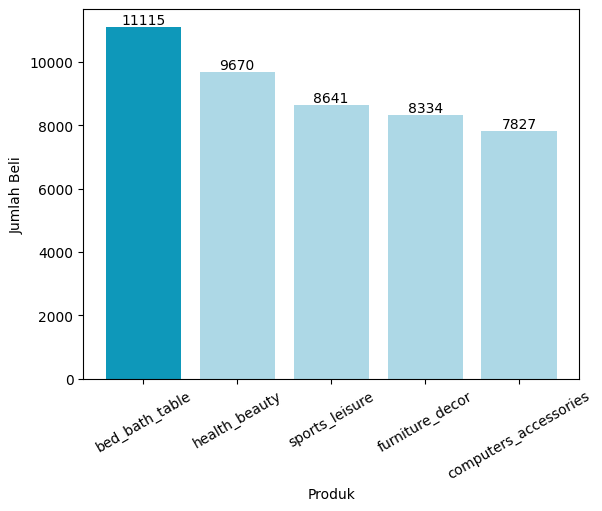

In [ ]:
# Mendefinisikan sumbu x dan y serta colornya
colors = [
    '#0E98BA',
    'lightblue', 'lightblue',
    'lightblue', 'lightblue',
    'lightblue', 'lightblue',
    'lightblue', 'lightblue',
    'lightblue']
x = sample_products['product_category_name_english']
y = sample_products['order_item_id']


bars = plt.bar(
    x,
    y,
    color=colors
)

addNumbers(bars)

plt.xlabel('Produk')
plt.ylabel('Jumlah Beli')
plt.xticks(rotation=30)
plt.show()

### Pertanyaan 2: Apa saja top 3 produk yang paling banyak dibeli ? (Farhan Nawwafal Pramudia)

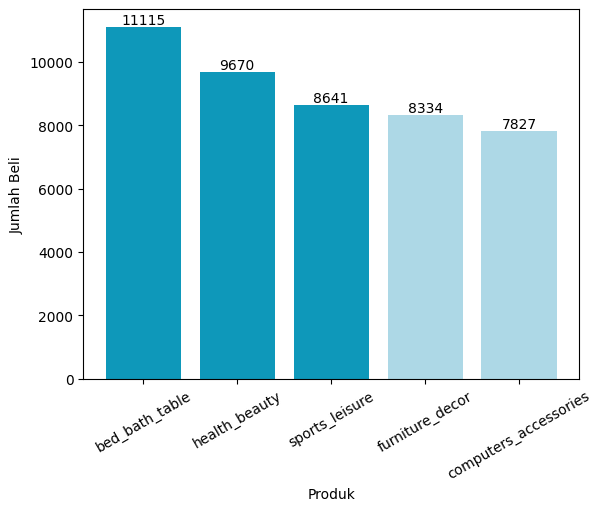

In [ ]:
# Mendefinisikan sumbu x dan y serta colornya
colors = [
    '#0E98BA',
    '#0E98BA', '#0E98BA',
    'lightblue', 'lightblue',
    'lightblue', 'lightblue',
    'lightblue', 'lightblue',
    'lightblue']
x = sample_products['product_category_name_english']
y = sample_products['order_item_id']


bars = plt.bar(
    x,
    y,
    color=colors
)

addNumbers(bars)

plt.xlabel('Produk')
plt.ylabel('Jumlah Beli')
plt.xticks(rotation=30)
plt.show()

### Pertanyaan 3 : Payment_Type apa yang paling banyak digunakan untuk pembayaran dan berapa persentasenya ? (Farhan Nawwafal Pramudia)

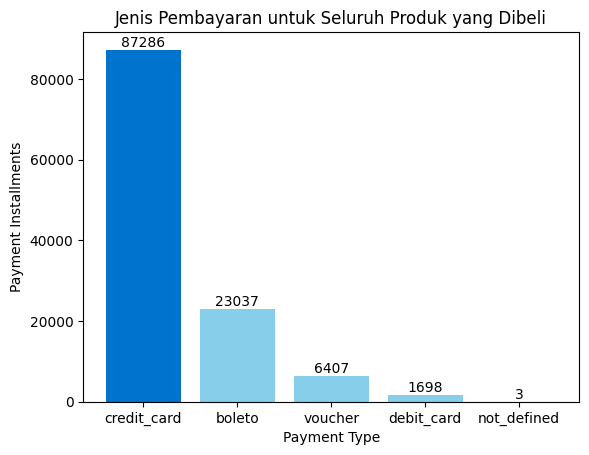

In [ ]:
# Menentukan sumbu x dan y
colors = ['#0073CF', 'skyblue', 'skyblue', 'skyblue', 'skyblue']
x = groupby_payment_type['payment_type'].unique()
y = groupby_payment_type['payment_installments']

bars_payments = plt.bar(
    x,
    y,
    color=colors
)

addNumbers(bars_payments)

plt.title('Jenis Pembayaran untuk Seluruh Produk yang Dibeli')
plt.xlabel('Payment Type')
plt.ylabel('Payment Installments')
plt.show()

Insight : Karna payment_type not_defined terlalu sedikit jumlahnya, sehingga akan memengaruhi ketika ingin ditampilkan dalam pie chart. Maka saya akan menyeleksi 4 payment_type pertama saja.

In [ ]:
# Memisahkan data not_defined
selected_payment_type = groupby_payment_type.head(4)

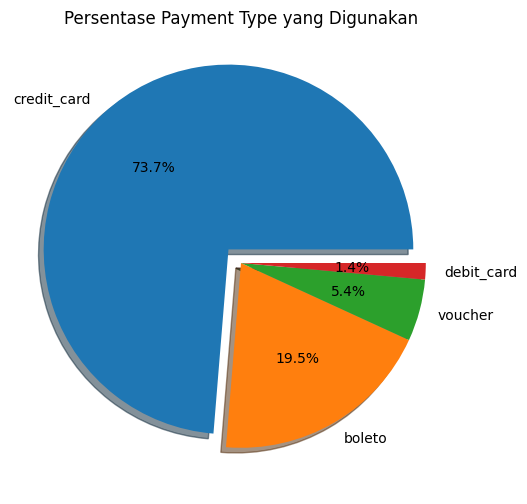

In [ ]:
explode = (0.1, 0, 0, 0)
plt.figure(figsize=(6,6))
plt.title('Persentase Payment Type yang Digunakan')
plt.pie(
    selected_payment_type['payment_installments'],
    explode=explode,
    labels=selected_payment_type['payment_type'].unique(),
    autopct='%1.1f%%',
    shadow=True,
)

plt.show()

### Pertanyaan 4: price produk apa yang memiliki harga tertinggi ? (Muhammad Faishal Rahmani)

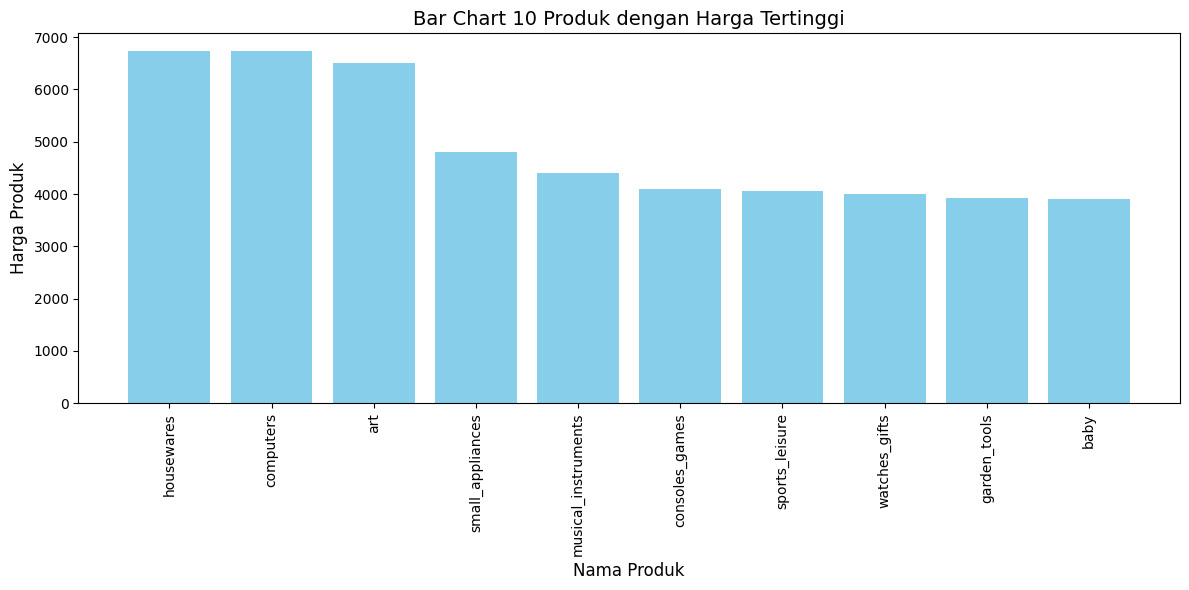

In [ ]:
# Urutkan data berdasarkan harga (price) secara descending
productTranslated_no_duplicates_sorted_desc = product_translated_not_null.sort_values(by='price', ascending=False)

# Ambil 10 data dengan harga tertinggi
top_10_highest_price = productTranslated_no_duplicates_sorted_desc.head(14)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_10_highest_price['product_category_name_english'], top_10_highest_price['price'], color='skyblue')

# Menambahkan label dan judul
plt.xlabel('Nama Produk', fontsize=12)
plt.ylabel('Harga Produk', fontsize=12)
plt.title('Bar Chart 10 Produk dengan Harga Tertinggi', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()

# Tampilkan grafik
plt.show()



### Pertanyaan 5: price produk apa yang memiliki harga terendah ?  (Muhammad Faishal Rahmani)

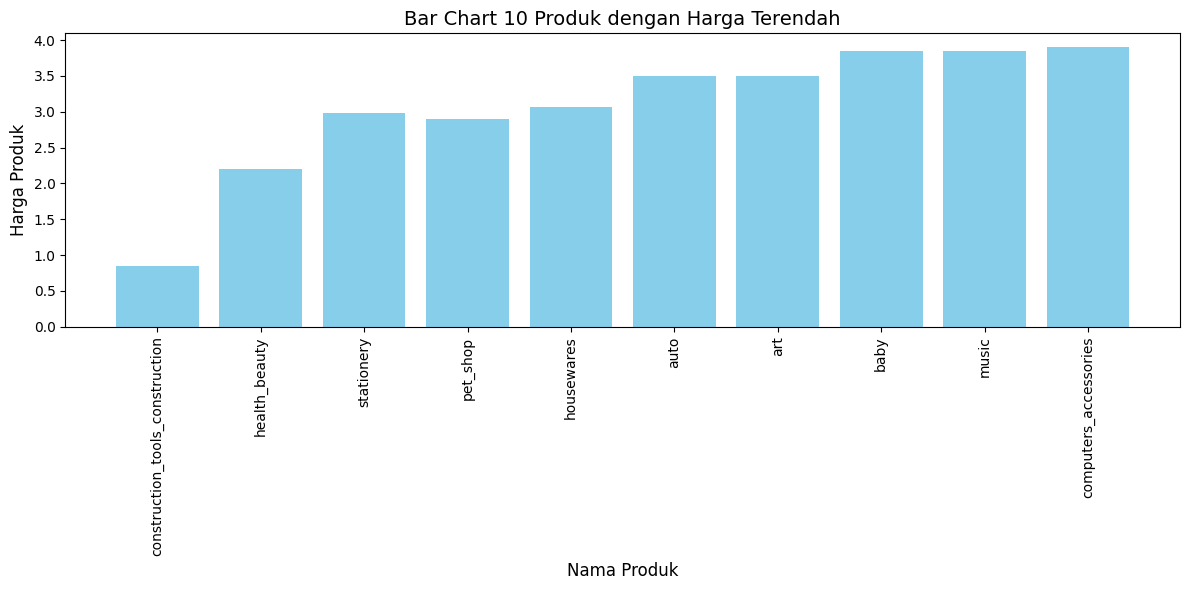

In [ ]:
# Urutkan data berdasarkan harga (price) secara ascending
productTranslated_no_duplicates_sorted_asc = product_translated_not_null.sort_values(by='price', ascending=True)

# Ambil 10 data dengan harga terendah
top_10_lowest_price = productTranslated_no_duplicates_sorted_asc.head(45)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_10_lowest_price['product_category_name_english'], top_10_lowest_price['price'], color='skyblue')

# Menambahkan label dan judul
plt.xlabel('Nama Produk', fontsize=12)
plt.ylabel('Harga Produk', fontsize=12)
plt.title('Bar Chart 10 Produk dengan Harga Terendah', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()

# Tampilkan grafik
plt.show()

### Pertanyaan 6: Kota apa saja yang mencatat pesanan (order) *perfumery* tertinggi ? (Dwi Putra Juniargi)

In [ ]:
# Filter data untuk kategori "perfumery"
parfum_orders = final_df_join[final_df_join['product_category_name_english'].str.lower() == 'perfumery']

# Hitung jumlah order per kota
orders_by_city = parfum_orders.groupby('seller_city')['order_id'].count().reset_index()

# Urutkan kota berdasarkan jumlah order tertinggi
orders_by_city = orders_by_city.sort_values(by='order_id', ascending=False)

# Menampilkan top 10 order terbanyak
display(orders_by_city.head(10))

,seller_city,order_id
67,santo andre,738
76,sao paulo,447
52,petropolis,384
11,campinas,321
59,riberao preto,139
71,sao goncalo,120
7,belo horizonte,118
85,valinhos,81
57,ribeirao preto,76
61,rio de janeiro,59


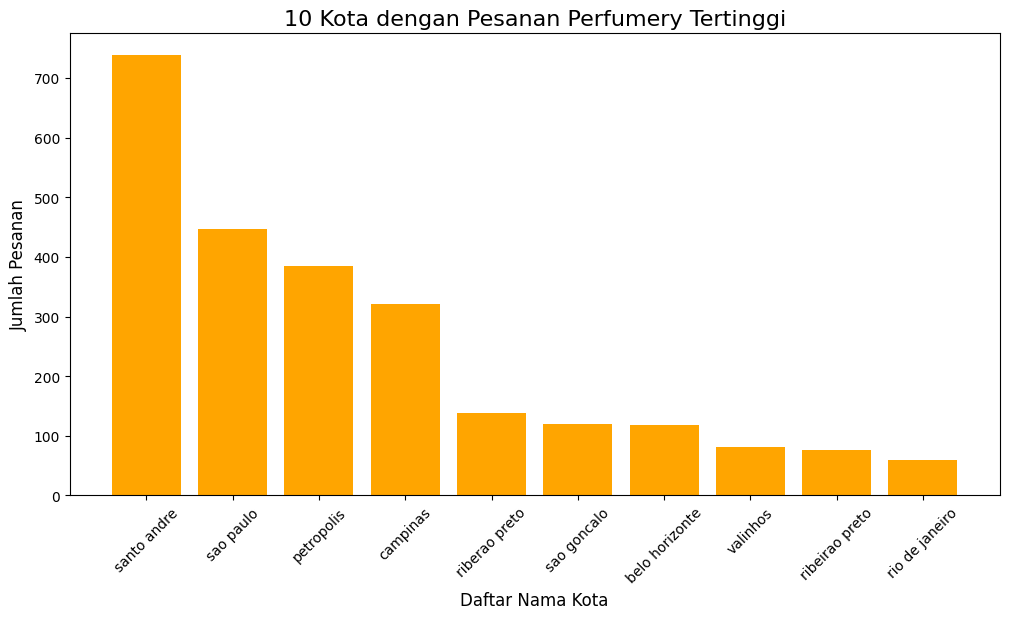

In [ ]:
# Ambil 10 kota dengan jumlah pesanan tertinggi
top_10_cities = orders_by_city.head(10)

# Visualisasi
plt.figure(figsize=(12, 6))
plt.bar(top_10_cities['seller_city'], top_10_cities['order_id'], color='orange')

# Menambahkan judul dan label
plt.title('10 Kota dengan Pesanan Perfumery Tertinggi', fontsize=16)
plt.xlabel('Daftar Nama Kota', fontsize=12)
plt.ylabel('Jumlah Pesanan', fontsize=12)
plt.xticks(rotation=45)

# Tampilkan grafik
plt.show()

### Pertanyaan 7: Di kota manakah produk *furniture_decor* paling banyak dipesan (order) ? (Dwi Putra Juniargi)

In [ ]:
# Filter data untuk kategori "furniture_decor"
furniture_orders = final_df_join[final_df_join['product_category_name_english'].str.lower() == 'furniture_decor']

# Hitung jumlah order per kota
orders_by_city = furniture_orders.groupby('seller_city')['order_id'].count().reset_index()

# Urutkan kota berdasarkan jumlah order tertinggi
orders_by_city = orders_by_city.sort_values(by='order_id', ascending=False)

# Menampilkan top 10 order terbanyak
display(orders_by_city.head(10))

,seller_city,order_id
130,sao paulo,2912
63,ibitinga,1075
43,curitiba,719
122,santo andre,234
107,porto ferreira,193
62,guarulhos,173
29,campinas,164
149,uba,156
33,cascavel,155
95,monte siao,142


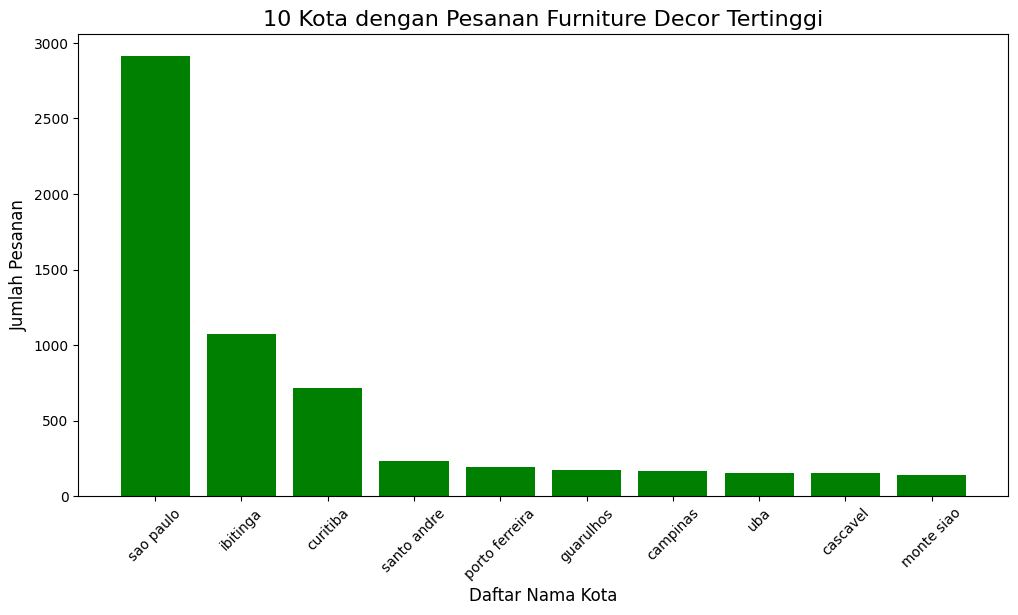

In [ ]:
# Ambil 10 kota dengan jumlah pesanan tertinggi
top_10_cities = orders_by_city.head(10)

# Visualisasi
plt.figure(figsize=(12, 6))
plt.bar(top_10_cities['seller_city'], top_10_cities['order_id'], color='green')

# Menambahkan judul dan label
plt.title('10 Kota dengan Pesanan Furniture Decor Tertinggi', fontsize=16)
plt.xlabel('Daftar Nama Kota', fontsize=12)
plt.ylabel('Jumlah Pesanan', fontsize=12)
plt.xticks(rotation=45)

# Tampilkan grafik
plt.show()

### Pertanyaan 8: Berapa total presentase untuk review_score bernilai 1 ? (Idin Naufal Hakim)

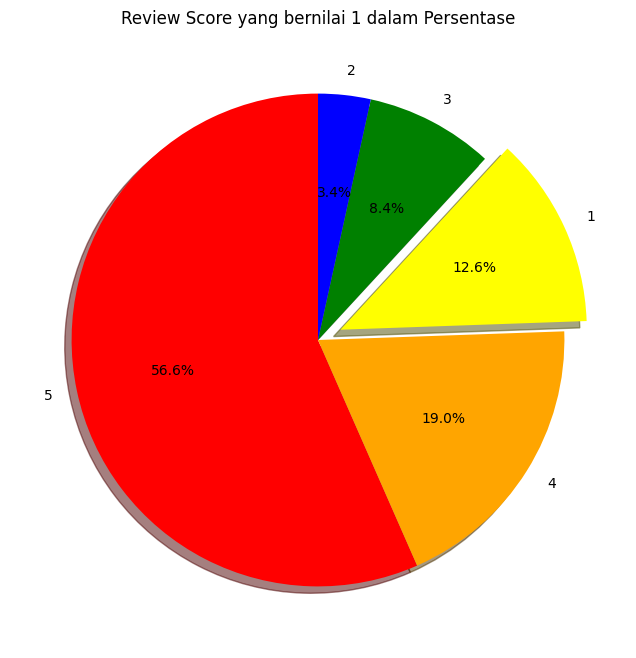

In [ ]:
# Menghitung distribusi review_score
review_score_counts = reviews_products_category["review_score"].value_counts()

# Total review
total_reviews = review_score_counts.sum()

# Persentase review untuk setiap skor
review_score_percentages = (review_score_counts / total_reviews) * 100

# Pie chart
labels = review_score_counts.index  # Skor review (1, 2, 3, 4, 5)
sizes = review_score_percentages   # Persentase untuk setiap skor
colors = ['red', 'orange', 'yellow', 'green', 'blue']  # Warna untuk setiap skor
explode = [0.1 if score == 1 else 0 for score in labels]  # Membedakan slice untuk skor 1

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True
)
plt.title("Review Score yang bernilai 1 dalam Persentase")
plt.show()


### Pertanyaan 9: Berapa presentase untuk masing-masing order_status ? (Idin Naufal Hakim)

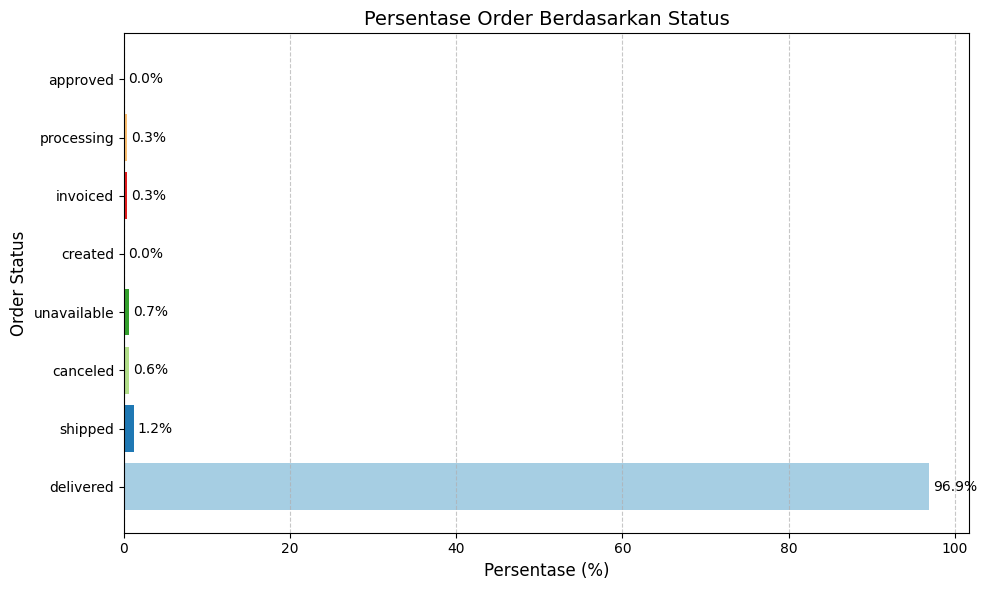

In [ ]:
import matplotlib.pyplot as plt

# Data untuk horizontal bar chart
status_labels = [
    "delivered", "shipped", "canceled",
    "unavailable", "created", "invoiced",
    "processing", "approved"
]

status_counts = [
    order_status_count_1, order_status_count_2, order_status_count_3,
    order_status_count_4, order_status_count_5, order_status_count_6,
    order_status_count_7, order_status_count_8
]

# Menghitung total dan persentase
total_orders = sum(status_counts)
status_percentages = [(count / total_orders) * 100 for count in status_counts]

# Membuat horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(status_labels, status_percentages, color=plt.cm.Paired.colors)

# Menambahkan judul dan label
plt.title("Persentase Order Berdasarkan Status", fontsize=14)
plt.xlabel("Persentase (%)", fontsize=12)
plt.ylabel("Order Status", fontsize=12)

# Menambahkan nilai persentase pada bar
for i, v in enumerate(status_percentages):
    plt.text(v + 0.5, i, f"{v:.1f}%", fontsize=10, va='center')

# Menampilkan grid pada sumbu x
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.tight_layout()
plt.show()


### Pertanyaan 10: Berapa jumlah data di review_score yang scorenya bernilai 5 ? (Muhammad Ikhsan Fadillah)


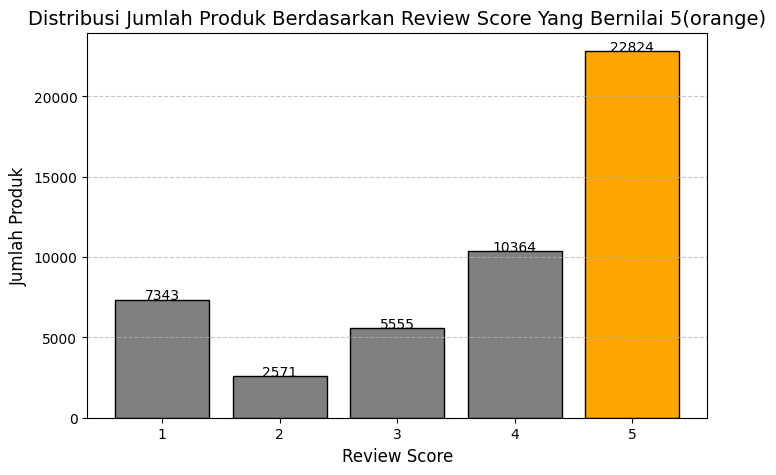

In [ ]:
# Data dari hasil perhitungan
scores = [1, 2, 3, 4, 5]
product_counts = [product_count_1, product_count_2, product_count_3, product_count_4, product_count_5]

# Pewarnaan khusus untuk review_score = 5
colors = ['grey', 'grey', 'grey', 'grey', 'orange']  # Warna berbeda untuk score 5

# Membuat barchart
plt.figure(figsize=(8, 5))
plt.bar(scores, product_counts, color=colors, edgecolor="black")

# Menambahkan detail ke grafik
plt.title("Distribusi Jumlah Produk Berdasarkan Review Score Yang Bernilai 5(orange)", fontsize=14)
plt.xlabel("Review Score", fontsize=12)
plt.ylabel("Jumlah Produk", fontsize=12)
plt.xticks(scores)  # Menampilkan angka 1-5 pada sumbu x
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Grid horizontal untuk estetika

# Menampilkan nilai di atas setiap bar
for i, count in enumerate(product_counts):
    plt.text(scores[i], count + 2, str(count), ha='center', fontsize=10)

# Tampilkan grafik
plt.show()

### Pertanyaan 11:  Apa saja top 3 produk dengan freight_value(biaya pengiriman) paling besar ? (Muhammad Ikhsan Fadillah)


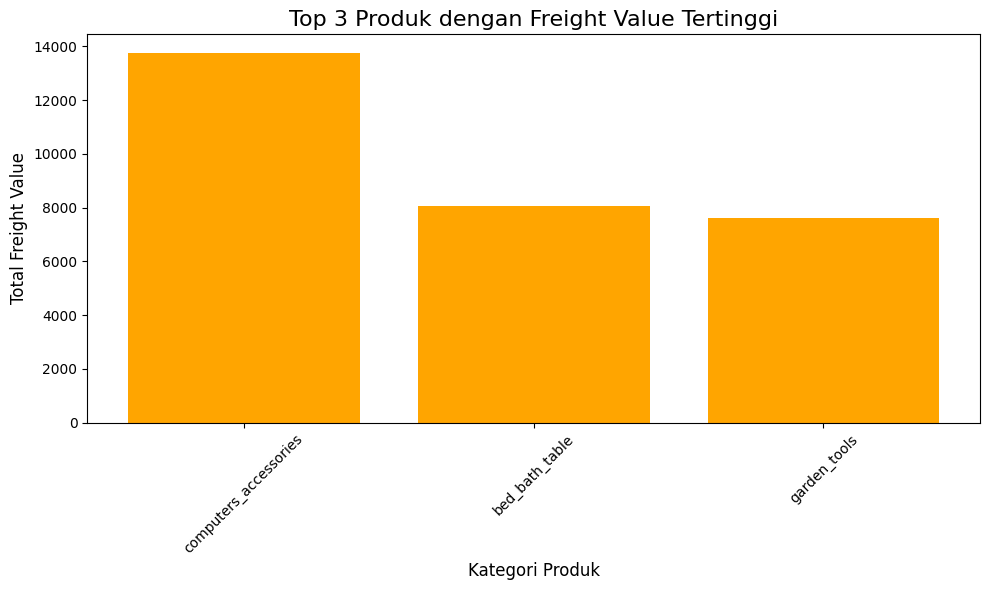

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_3_freight["product_category_name_english"], top_3_freight["freight_value"], color="orange")
plt.title("Top 3 Produk dengan Freight Value Tertinggi", fontsize=16)
plt.xlabel("Kategori Produk", fontsize=12)
plt.ylabel("Total Freight Value", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pertanyaan 12 : 5 Kota mana saja yang memiliki catatan rata-rata freight_value(biaya pengiriman) paling besar ? (Muhammad Ikhsan Fadillah)

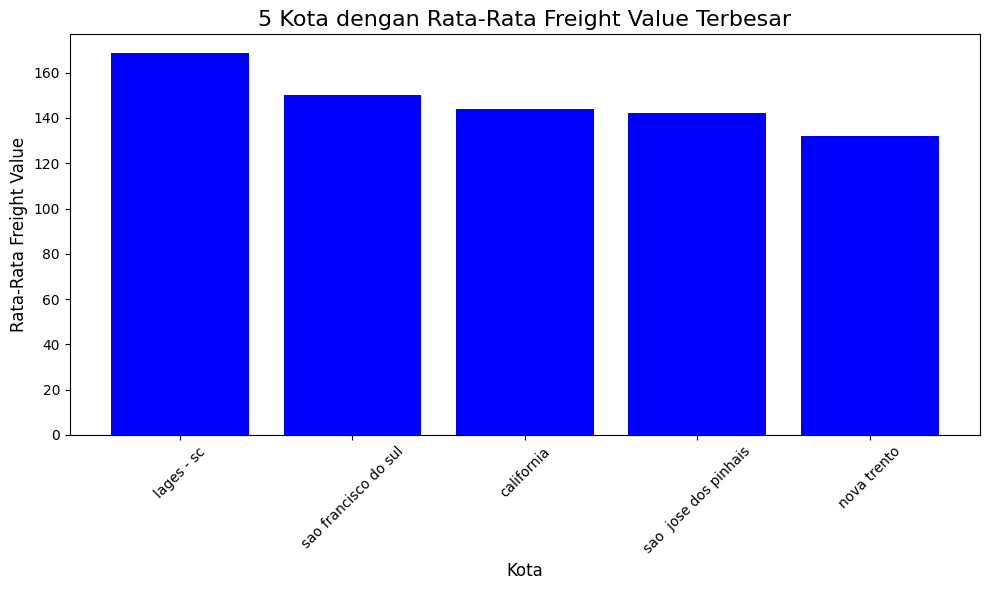

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(top_5_cities_df["seller_city"], top_5_cities_df["freight_value"], color="blue")
plt.title("5 Kota dengan Rata-Rata Freight Value Terbesar", fontsize=16)
plt.xlabel("Kota", fontsize=12)
plt.ylabel("Rata-Rata Freight Value", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Pertanyaan 13 : Berapa Rata Rata dimensi product (Panjang, Lebar, Tinggi) ? (Rizqi Akbar Fadilah)

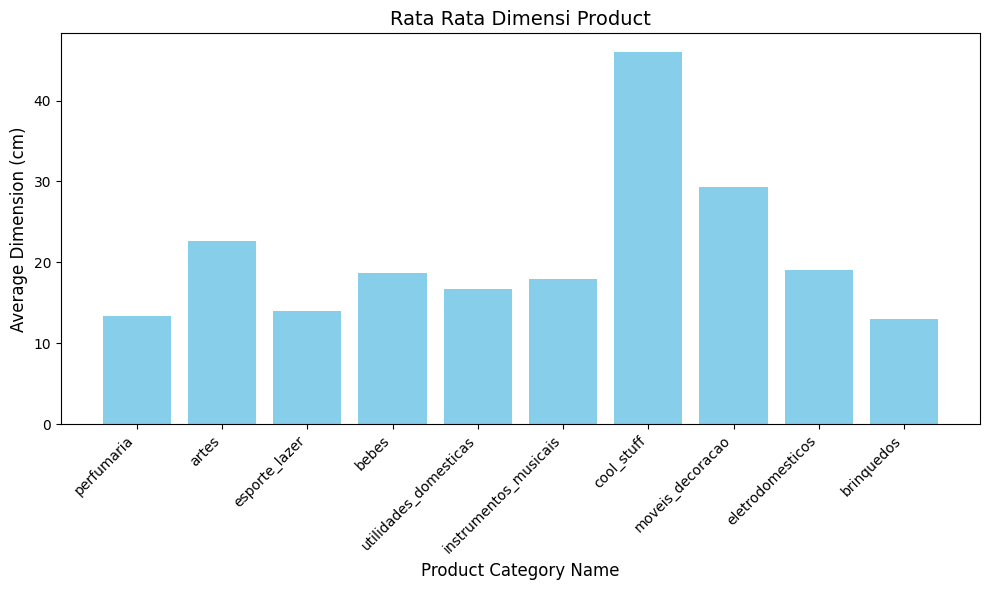

In [ ]:
# Hitung rata-rata dimensi
products_df['average_dimension'] = (products_df['product_length_cm'] + products_df['product_width_cm'] + products_df['product_height_cm']) / 3

# Pilih beberapa data untuk visualisasi (misalnya, 10 produk pertama)
sample_data = products_df[['product_category_name', 'average_dimension']].head(10)

# Membuat diagram batang
plt.figure(figsize=(10, 6))
plt.bar(sample_data['product_category_name'], sample_data['average_dimension'], color='skyblue')
plt.xlabel('Product Category Name', fontsize=12)
plt.ylabel('Average Dimension (cm)', fontsize=12)
plt.title('Rata Rata Dimensi Product', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

## Conclusion

- Conclusion pertanyaan 1 : Berdasarkan visualisasi yang telah ditampilkan dalam bentuk bar chart, terlihat jelas bahwa produk yang paling banyak dibeli adalah **bed_bath_table** sebanyak 11115.  
- Conclusion pertanyaan 2 :  Berdasarkan visualisasi yang telah ditampilkan dalam bentuk bar chart, terlihat jelas bahwa 3 produk yang paling banyak dibeli adalah **bed_bath_table, healty_beauty, dan sport_leisure**.  
- Conclusion pertanyaan 3 :  Berdasarkan visualisasi yang telah ditampilkan dalam bentuk bar chart dan pie chart, terlihat jelas bahwa payment_type yang paling banyak digunakan adalah **credit_card** dengan persentase 73.7%
- Conclusion pertanyaan 4 : Terbukti bahwa ketegori produk dengan harga tertinggi adalah "housewares"
- Conclusion pertanyaan 5 : Terbukti bahwa ketegori produk dengan harga terendah adalah "construction_tools_construction"  
- Conclusion pertanyaan 6 : Berdasarkan bar chart **"10 Kota dengan Pesanan Perfumery Tertinggi"** maka diketahui bahwa kota dengan pesanan (order) perfumery tertinggi yaitu *santo andre, sao paulo, petropolis, campinas, riberao preto, sao goncalo, belo horizonte, valinhos, ribeirao preto, rio de janeiro.*  
- Conclusion pertanyaan 7 : Berdasarkan bar chart **"10 Kota dengan Pesanan Furniture Decor Tertinggi"** maka diketahui bahwa kota dengan pesanan (order) *furniture_decor* tertinggi ada di kota *sao paulo* dengan total 2912 pesanan.
- Conclusion pertanyaan 10 : Berdasarkan hasil visualisasi yang sudah ditampilkan dalam bentuk bar chart, dapat disimpulkan bahwa banyak jumlah produk dengan **review_score** bernilai 5 adalah  sebanyak 22824.  
- Conclusion pertanyaan 11 : Berdasarkan hasil visualisasi yang sudah ditampilkan dalam bentuk bar chart, dapat disimpulkan bahwa 3 produk dengan jumlah **freight_value** paling besar adalah *computers_accessories*, *bed_bath_table* , *garden_tools*.
- Conclusion pertanyaan 12 : Berdasarkan hasil visualisasi yang sudah ditampilkan dalam bentuk bar chart, dapat disimpulkan bahwa 5 kota dengan rata-rata **freight_value** paling besar adalah *lages - sc*, *sao francisco do sul*, *california*, *sao jose dos pinhais*, *nova trento*.
-Conclusion Pertanyaan 13: Berdasarkan bar chart **Rata Rata Dimensi Barang** maka diketahui  bahwa product dengan rata rata dimensi tertinggi adalah  *cool_stuff* dengan rata-rata dimensi nya 45 Cm